In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
youtube_in = pd.read_csv('./INvideos.csv')
in_category = pd.read_json('./IN_category_id.json')

In [3]:
youtube_in.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,kzwfHumJyYc,17.14.11,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,2017-11-12T12:20:39.000Z,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,https://i.ytimg.com/vi/kzwfHumJyYc/default.jpg,False,False,False,Presenting Sharry Mann latest Punjabi Song Cu...
1,zUZ1z7FwLc8,17.14.11,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,2017-11-13T05:43:56.000Z,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,https://i.ytimg.com/vi/zUZ1z7FwLc8/default.jpg,True,False,False,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं..."
2,10L1hZ9qa58,17.14.11,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,2017-11-12T15:48:08.000Z,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,https://i.ytimg.com/vi/10L1hZ9qa58/default.jpg,False,False,False,Watch Stylish Star Allu Arjun @ ChaySam Weddin...
3,N1vE8iiEg64,17.14.11,Eruma Saani | Tamil vs English,Eruma Saani,23,2017-11-12T07:08:48.000Z,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684,https://i.ytimg.com/vi/N1vE8iiEg64/default.jpg,False,False,False,This video showcases the difference between pe...
4,kJzGH0PVQHQ,17.14.11,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,2017-11-13T01:14:16.000Z,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,66,https://i.ytimg.com/vi/kJzGH0PVQHQ/default.jpg,False,False,False,why Samantha became EMOTIONAL @ Samantha naga ...


In [4]:
in_category.head()

,kind,etag,items
0,youtube#videoCategoryListResponse,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""XI..."
1,youtube#videoCategoryListResponse,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""XI..."
2,youtube#videoCategoryListResponse,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""XI..."
3,youtube#videoCategoryListResponse,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""XI..."
4,youtube#videoCategoryListResponse,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""XI..."


In [5]:
in_category = in_category[['items']]
in_category.head()

,items
0,"{'kind': 'youtube#videoCategory', 'etag': '""XI..."
1,"{'kind': 'youtube#videoCategory', 'etag': '""XI..."
2,"{'kind': 'youtube#videoCategory', 'etag': '""XI..."
3,"{'kind': 'youtube#videoCategory', 'etag': '""XI..."
4,"{'kind': 'youtube#videoCategory', 'etag': '""XI..."


In [6]:
in_category = pd.DataFrame.from_records(in_category["items"], columns=["id",'snippet'])
df = pd.DataFrame.from_records(in_category["snippet"], columns=["channelId",'title','assignable'])
in_category['category'] =  df['title']
in_category.drop(columns=['snippet'],inplace=True)
in_category = in_category.rename(columns={'id':'category_id'})
in_category.head()

,category_id,category
0,1,Film & Animation
1,2,Autos & Vehicles
2,10,Music
3,15,Pets & Animals
4,17,Sports


Learning about the type of data at hand

In [7]:
in_category.dtypes

category_id    object
category       object
dtype: object

In [8]:
youtube_in.dtypes

video_id                  object
trending_date             object
title                     object
channel_title             object
category_id                int64
publish_time              object
tags                      object
views                      int64
likes                      int64
dislikes                   int64
comment_count              int64
thumbnail_link            object
comments_disabled           bool
ratings_disabled            bool
video_error_or_removed      bool
description               object
dtype: object

In [9]:
# Converting datatype of id to numeric for matching & merging with other table
in_category['category_id'] = in_category['category_id'].str.strip()
in_category['category_id'] = in_category['category_id'].astype('int')

In [10]:
# Merging these ids against each category id from the other table data
in_df = pd.merge(youtube_in,
                  in_category,
                  how='left',
                  on='category_id')
in_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category
0,kzwfHumJyYc,17.14.11,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,2017-11-12T12:20:39.000Z,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,https://i.ytimg.com/vi/kzwfHumJyYc/default.jpg,False,False,False,Presenting Sharry Mann latest Punjabi Song Cu...,Film & Animation
1,zUZ1z7FwLc8,17.14.11,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,2017-11-13T05:43:56.000Z,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,https://i.ytimg.com/vi/zUZ1z7FwLc8/default.jpg,True,False,False,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",News & Politics
2,10L1hZ9qa58,17.14.11,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,2017-11-12T15:48:08.000Z,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,https://i.ytimg.com/vi/10L1hZ9qa58/default.jpg,False,False,False,Watch Stylish Star Allu Arjun @ ChaySam Weddin...,Entertainment
3,N1vE8iiEg64,17.14.11,Eruma Saani | Tamil vs English,Eruma Saani,23,2017-11-12T07:08:48.000Z,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684,https://i.ytimg.com/vi/N1vE8iiEg64/default.jpg,False,False,False,This video showcases the difference between pe...,Comedy
4,kJzGH0PVQHQ,17.14.11,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,2017-11-13T01:14:16.000Z,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,66,https://i.ytimg.com/vi/kJzGH0PVQHQ/default.jpg,False,False,False,why Samantha became EMOTIONAL @ Samantha naga ...,Entertainment


In [11]:
in_df.isnull().sum()

video_id                    0
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               561
category                  105
dtype: int64

In [12]:
in_df.category.value_counts()

Entertainment           16712
News & Politics          5241
Music                    3858
Comedy                   3429
People & Blogs           2624
Film & Animation         1658
Education                1227
Howto & Style             845
Sports                    731
Science & Technology      552
Shows                     205
Autos & Vehicles           72
Gaming                     66
Movies                     16
Travel & Events             8
Pets & Animals              3
Name: category, dtype: int64

In [13]:
in_df.loc[in_df['category'].isna(),'category_id'].value_counts()

29    105
Name: category_id, dtype: int64

In [14]:
# Let us assign all the category_id 29 videos to a new category called 'Others'
in_df.loc[in_df['category'].isna(),'category'] = 'Others'
in_df.category.value_counts()

Entertainment           16712
News & Politics          5241
Music                    3858
Comedy                   3429
People & Blogs           2624
Film & Animation         1658
Education                1227
Howto & Style             845
Sports                    731
Science & Technology      552
Shows                     205
Others                    105
Autos & Vehicles           72
Gaming                     66
Movies                     16
Travel & Events             8
Pets & Animals              3
Name: category, dtype: int64

In [15]:
in_df.isnull().sum()

video_id                    0
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               561
category                    0
dtype: int64

In [16]:
# Dropping the columns Description,thumbnail_link,tags,channel_title as we are not going to do a text based analysis
in_df.drop(columns=['description','thumbnail_link','tags','channel_title','title'],inplace=True)
# Since we already mapped categories, removing the category id from the DF
in_df.drop(columns=['category_id'],inplace=True)

In [17]:
in_df.dtypes

video_id                  object
trending_date             object
publish_time              object
views                      int64
likes                      int64
dislikes                   int64
comment_count              int64
comments_disabled           bool
ratings_disabled            bool
video_error_or_removed      bool
category                  object
dtype: object

In [18]:
in_df.publish_time.value_counts()

2018-04-21T13:30:01.000Z    18
2018-05-23T16:00:03.000Z    17
2018-04-24T07:58:08.000Z    16
2018-04-26T12:30:01.000Z    16
2018-03-01T04:30:01.000Z    15
                            ..
2017-12-19T01:31:47.000Z     1
2017-12-24T08:37:30.000Z     1
2018-01-08T13:13:46.000Z     1
2018-04-25T16:27:42.000Z     1
2018-04-13T05:35:45.000Z     1
Name: publish_time, Length: 16339, dtype: int64

In [19]:
in_df.trending_date.value_counts()

17.15.11    200
18.24.01    200
17.25.11    200
18.22.01    200
18.21.01    200
           ... 
18.03.02    154
18.04.03    152
17.20.12    152
18.26.03    152
18.15.03    114
Name: trending_date, Length: 205, dtype: int64

If we observe the publish time, it varies a lot based on when each and every video was released. 
While the trending date seems to repeating and has some pattern maybe, which we can try and analyze.
The trending date seems to be in the format yy-dd-mm, lets find the day & time frame when the video became trending & the when it was published. There are 2 approaches to doing it, the one using apply is costly, so we'll use the approach in the cell after apply.

In [ ]:
# Costly Approach
'''
import datetime
in_df['trending_date'] = in_df['trending_date'].astype('str')
def get_day_time(df):
    y,d,m = (int(x) for x in df['trending_date'].split('.'))
    day = datetime.date(y, m, d).strftime('%A')
    hour = datetime.datetime.strptime(df['publish_time'],"%Y-%m-%dT%H:%M:%S.%fZ").strftime('%H')
    df['trend_day'] = day
    df['publish_hour'] = hour
    return df
in_df = in_df.apply(get_day_time,axis=1)
in_df.head()
'''

In [21]:
import datetime
in_df['ydm'] = in_df['trending_date'].str.split('.')
in_df['publish_time'] = in_df['publish_time'].astype('str')
in_df['day'] = [datetime.date(int(y),int(m),int(d)).weekday() for y,d,m in in_df['ydm']]
in_df['publish_hour'] = pd.to_datetime(in_df['publish_time']).dt.hour
in_df['publish_month'] = pd.to_datetime(in_df['publish_time']).dt.month
in_df.head()

,video_id,trending_date,publish_time,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,category,ydm,day,publish_hour,publish_month
0,kzwfHumJyYc,17.14.11,2017-11-12T12:20:39.000Z,1096327,33966,798,882,False,False,False,Film & Animation,"[17, 14, 11]",1,12,11
1,zUZ1z7FwLc8,17.14.11,2017-11-13T05:43:56.000Z,590101,735,904,0,True,False,False,News & Politics,"[17, 14, 11]",1,5,11
2,10L1hZ9qa58,17.14.11,2017-11-12T15:48:08.000Z,473988,2011,243,149,False,False,False,Entertainment,"[17, 14, 11]",1,15,11
3,N1vE8iiEg64,17.14.11,2017-11-12T07:08:48.000Z,1242680,70353,1624,2684,False,False,False,Comedy,"[17, 14, 11]",1,7,11
4,kJzGH0PVQHQ,17.14.11,2017-11-13T01:14:16.000Z,464015,492,293,66,False,False,False,Entertainment,"[17, 14, 11]",1,1,11


In [22]:
# dropping the ydm column
in_df.drop(columns=['ydm'],inplace=True)
in_df.head()

,video_id,trending_date,publish_time,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,category,day,publish_hour,publish_month
0,kzwfHumJyYc,17.14.11,2017-11-12T12:20:39.000Z,1096327,33966,798,882,False,False,False,Film & Animation,1,12,11
1,zUZ1z7FwLc8,17.14.11,2017-11-13T05:43:56.000Z,590101,735,904,0,True,False,False,News & Politics,1,5,11
2,10L1hZ9qa58,17.14.11,2017-11-12T15:48:08.000Z,473988,2011,243,149,False,False,False,Entertainment,1,15,11
3,N1vE8iiEg64,17.14.11,2017-11-12T07:08:48.000Z,1242680,70353,1624,2684,False,False,False,Comedy,1,7,11
4,kJzGH0PVQHQ,17.14.11,2017-11-13T01:14:16.000Z,464015,492,293,66,False,False,False,Entertainment,1,1,11


In [23]:
# df = in_df[['publish_hour','views']].groupby(['publish_hour']).sum()
# df = df.sort_values('views',ascending=False)
# df['hr_category'] = pd.qcut(df['views'], 4, labels=["low", "average", "medium", "high"])
# df.reset_index(inplace=True)
# df.head()

In [24]:
# new_df = pd.merge(in_df,df[['hr_category','publish_hour']],on='publish_hour',how='left')
new_df = in_df.copy()
new_df.head()

,video_id,trending_date,publish_time,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,category,day,publish_hour,publish_month
0,kzwfHumJyYc,17.14.11,2017-11-12T12:20:39.000Z,1096327,33966,798,882,False,False,False,Film & Animation,1,12,11
1,zUZ1z7FwLc8,17.14.11,2017-11-13T05:43:56.000Z,590101,735,904,0,True,False,False,News & Politics,1,5,11
2,10L1hZ9qa58,17.14.11,2017-11-12T15:48:08.000Z,473988,2011,243,149,False,False,False,Entertainment,1,15,11
3,N1vE8iiEg64,17.14.11,2017-11-12T07:08:48.000Z,1242680,70353,1624,2684,False,False,False,Comedy,1,7,11
4,kJzGH0PVQHQ,17.14.11,2017-11-13T01:14:16.000Z,464015,492,293,66,False,False,False,Entertainment,1,1,11


In [25]:
new_df.video_error_or_removed.value_counts()

False    37341
True        11
Name: video_error_or_removed, dtype: int64

In [26]:
new_df[new_df['video_error_or_removed']==True]

,video_id,trending_date,publish_time,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,category,day,publish_hour,publish_month
27488,q8v9MvManKE,18.22.04,2018-04-21T15:00:50.000Z,2919347,344509,6816,29131,False,False,True,Film & Animation,6,15,4
27626,q8v9MvManKE,18.22.04,2018-04-21T15:00:50.000Z,2919347,344513,6816,29131,False,False,True,Film & Animation,6,15,4
27677,q8v9MvManKE,18.23.04,2018-04-21T15:00:50.000Z,4733057,445944,10306,35394,False,False,True,Film & Animation,0,15,4
27823,q8v9MvManKE,18.23.04,2018-04-21T15:00:50.000Z,4733057,445947,10306,35394,False,False,True,Film & Animation,0,15,4
27876,q8v9MvManKE,18.24.04,2018-04-21T15:00:50.000Z,1682462,175181,4182,14250,False,False,True,Film & Animation,1,15,4
28014,q8v9MvManKE,18.24.04,2018-04-21T15:00:50.000Z,1682462,175183,4182,14250,False,False,True,Film & Animation,1,15,4
28075,q8v9MvManKE,18.25.04,2018-04-21T15:00:50.000Z,880003,14642,453,2875,False,False,True,Film & Animation,2,15,4
28220,q8v9MvManKE,18.25.04,2018-04-21T15:00:50.000Z,880003,14642,453,2875,False,False,True,Film & Animation,2,15,4
28295,q8v9MvManKE,18.26.04,2018-04-21T15:00:50.000Z,521421,34559,1915,5723,False,False,True,Film & Animation,3,15,4
28422,q8v9MvManKE,18.26.04,2018-04-21T15:00:50.000Z,521421,34559,1915,5723,False,False,True,Film & Animation,3,15,4


In [27]:
# let us drop the cases when the video was removed or had some error from our analysis
new_df = new_df[new_df['video_error_or_removed']!=True]
new_df.video_error_or_removed.value_counts()

False    37341
Name: video_error_or_removed, dtype: int64

In [28]:
new_df.drop(columns=['video_error_or_removed'],inplace=True)

### Exploratory Data Analysis

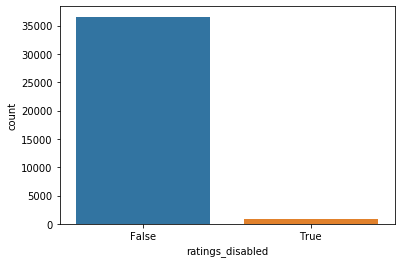

In [29]:
sns.countplot(x="ratings_disabled", data=new_df)

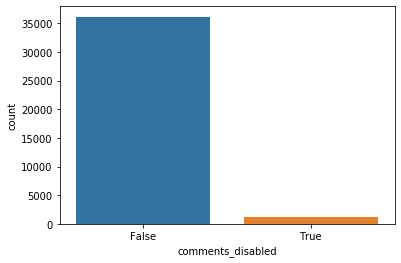

In [30]:
sns.countplot(x="comments_disabled", data=new_df)

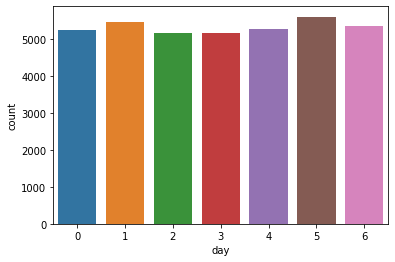

In [31]:
sns.countplot(x="day", data=new_df)

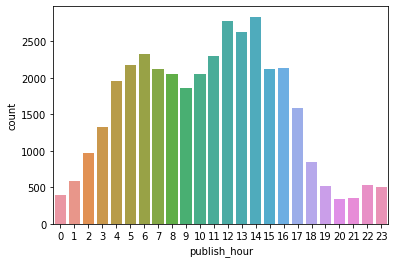

In [32]:
# No. of videos released at each hour of the day
sns.countplot(x="publish_hour", data=new_df)

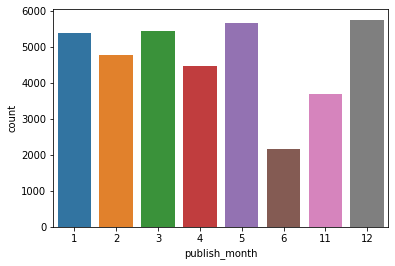

In [33]:
# No. of videos released each month 
sns.countplot(x="publish_month", data=new_df)

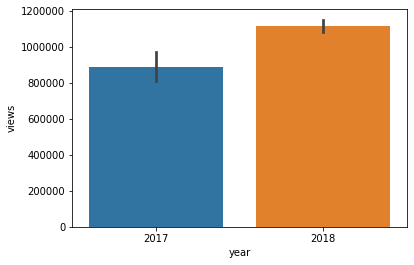

In [34]:
new_df['year'] = pd.DatetimeIndex(new_df['publish_time']).year
# No. of videos split
sns.barplot(x="year",y="views", data=new_df)

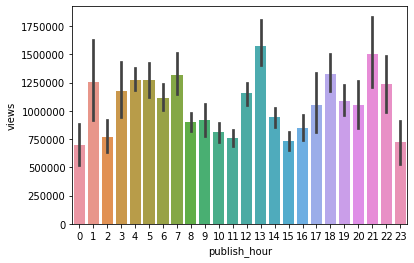

In [35]:
# No. of views for videos released based on each hour of the day
sns.barplot(x="publish_hour", y="views", data=new_df)

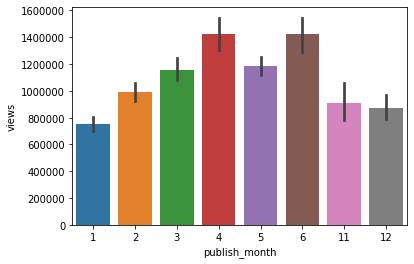

In [36]:
# No. of views for videos released based on each month
sns.barplot(x="publish_month", y="views", data=new_df)

In [37]:
# No. of likes for videos released based on each hour of the day
#sns.barplot(x="hr_category", y="views", data=new_df)
# sns.countplot(x="hr_category",data=new_df)
new_df.head()

,video_id,trending_date,publish_time,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,category,day,publish_hour,publish_month,year
0,kzwfHumJyYc,17.14.11,2017-11-12T12:20:39.000Z,1096327,33966,798,882,False,False,Film & Animation,1,12,11,2017
1,zUZ1z7FwLc8,17.14.11,2017-11-13T05:43:56.000Z,590101,735,904,0,True,False,News & Politics,1,5,11,2017
2,10L1hZ9qa58,17.14.11,2017-11-12T15:48:08.000Z,473988,2011,243,149,False,False,Entertainment,1,15,11,2017
3,N1vE8iiEg64,17.14.11,2017-11-12T07:08:48.000Z,1242680,70353,1624,2684,False,False,Comedy,1,7,11,2017
4,kJzGH0PVQHQ,17.14.11,2017-11-13T01:14:16.000Z,464015,492,293,66,False,False,Entertainment,1,1,11,2017


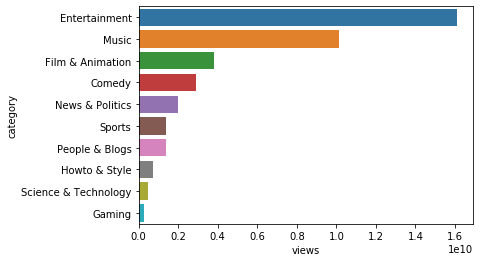

In [38]:
fdf = new_df.groupby('category').views.agg('sum').sort_values(ascending=False).reset_index()
fdf = fdf.nlargest(10,'views')
fdf
# Top 5 No. of views based on video category 
g = sns.barplot(x="views",y="category",data=fdf,orient='h')
# g.set_xticklabels(g.get_xticklabels(), rotation=90)

<h3><center> **********</center></h3>

#### The visualizations above are self-explanatory. 
#### We get a clear picture of how the number of views vary based on other features we have in the data.